# Preprocessing the data:

In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('/content/income_evaluation.csv')

In [2]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


we need to use standraization or use batch normalization

education and education-num may refer to the same data

In [3]:
data.shape

(32561, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.isna().sum().sum()

0

In [6]:
# drop null values
data.dropna(inplace =True)

In [7]:
data.isna().sum().sum()

0

In [8]:
data[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

there is no imbalance issue

# Data Analysis:

In [9]:
import matplotlib.pyplot as plt
 
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "blue",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [10]:
# get list of object columns names
object_columns_name =list(data.select_dtypes(['object']))

In [11]:
# see the number of unique values in every catogrical column

for col in object_columns_name:
  print(col,':',data[col].nunique())

print(' education-num :', data[' relationship'].nunique())

 workclass : 9
 education : 16
 marital-status : 7
 occupation : 15
 relationship : 6
 race : 5
 sex : 2
 native-country : 42
 income : 2
 education-num : 6


education and education_num dosn't represent the same data

In [12]:
import seaborn as sns

## Plot countplot for catagorical data:

In [13]:
# remove the columns that have large number of unique values 
object_columns_name.remove(' native-country')

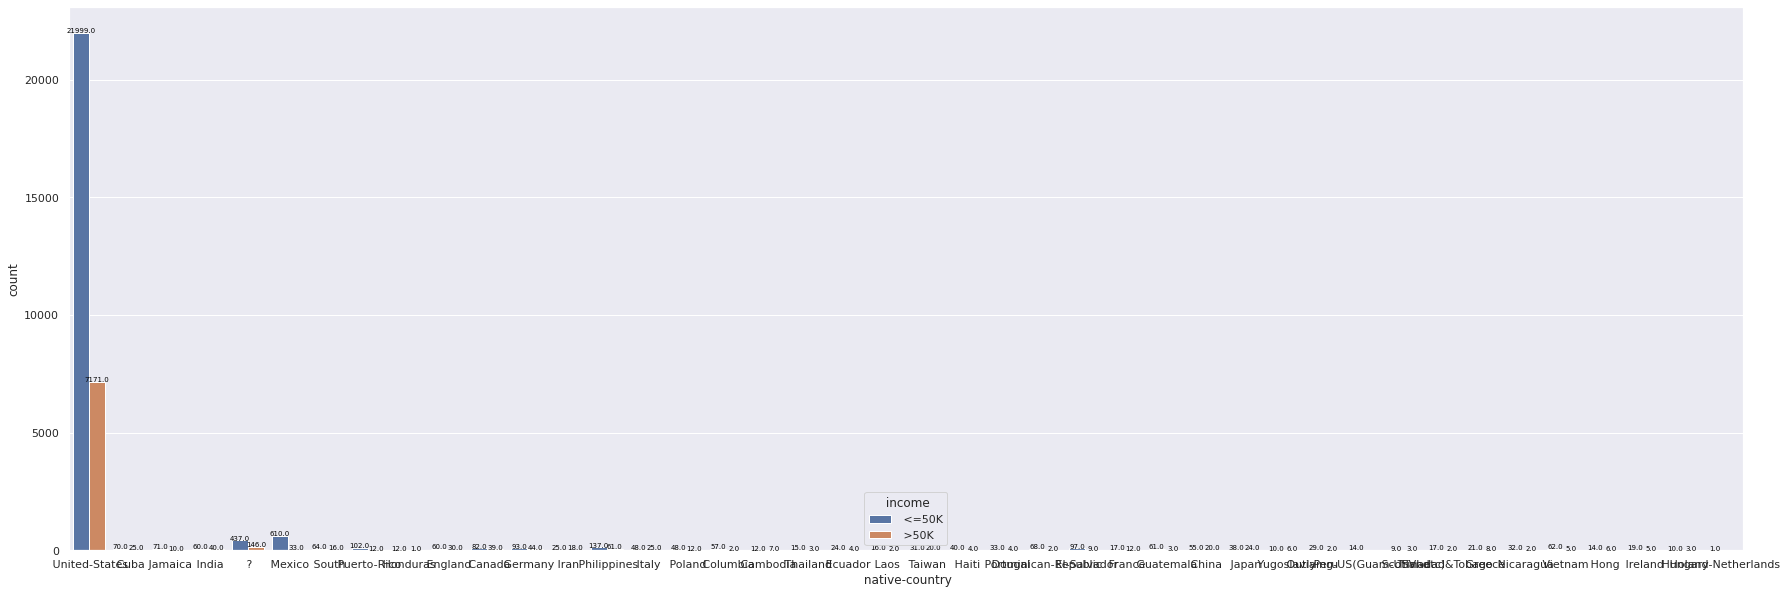

In [14]:
#plot native_country column with imcome
sns.set(rc={'figure.figsize':(30,10)})

a=sns.countplot(data=data,x=' native-country',hue=' income')

for p in a.patches:
  a.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',color='black',size=7)

there are some catogries that indicate only one class

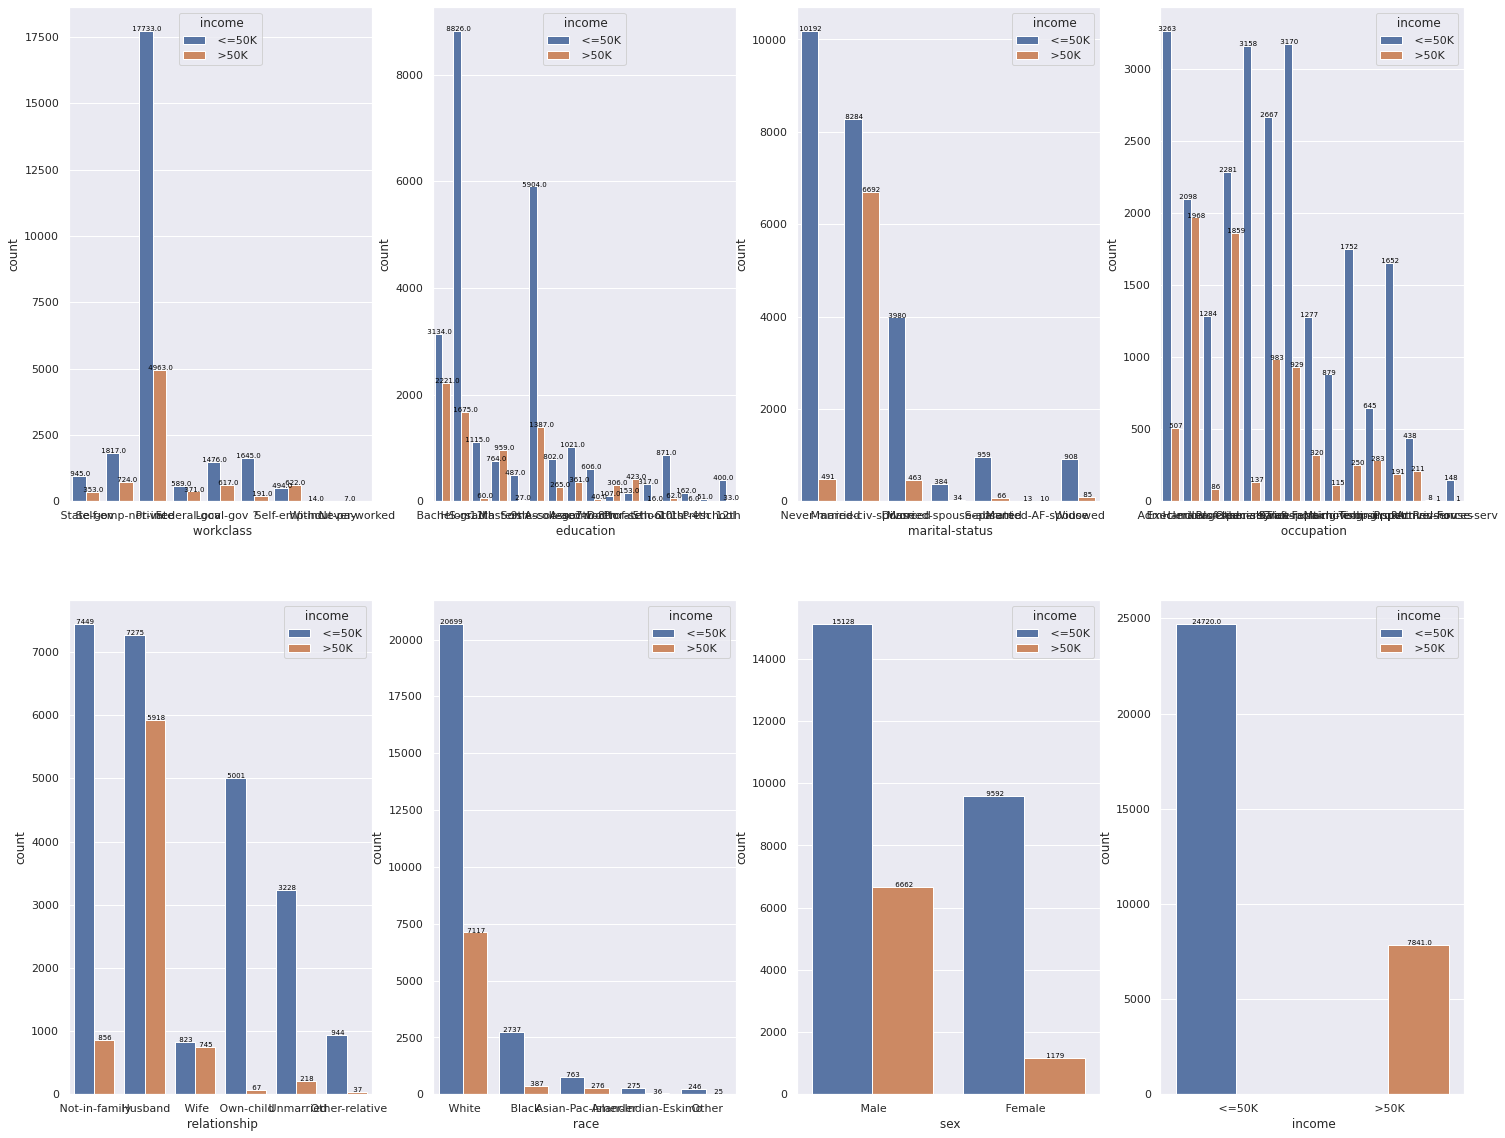

In [15]:
# plot the rest of the catogrical data

fig, ax =plt.subplots(ncols=4, nrows=2, figsize=(25,20))

ax=ax.flatten()

# index for the figures
i=0

for col in object_columns_name:
  a=sns.countplot(data=data, x=col, hue=' income', ax=ax[i])
  for p in a.patches:
    a.annotate(f'\n {p.get_height()}',(p.get_x()+0.2, p.get_height()),ha='center',color='black',size=7)
  i =i+1  

## Plot distplot for numerical data:

In [16]:
numerical_columns_name=list(data.select_dtypes(['int64']))

In [17]:
data[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

In [18]:
numerical_columns_name

['age',
 ' fnlwgt',
 ' education-num',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

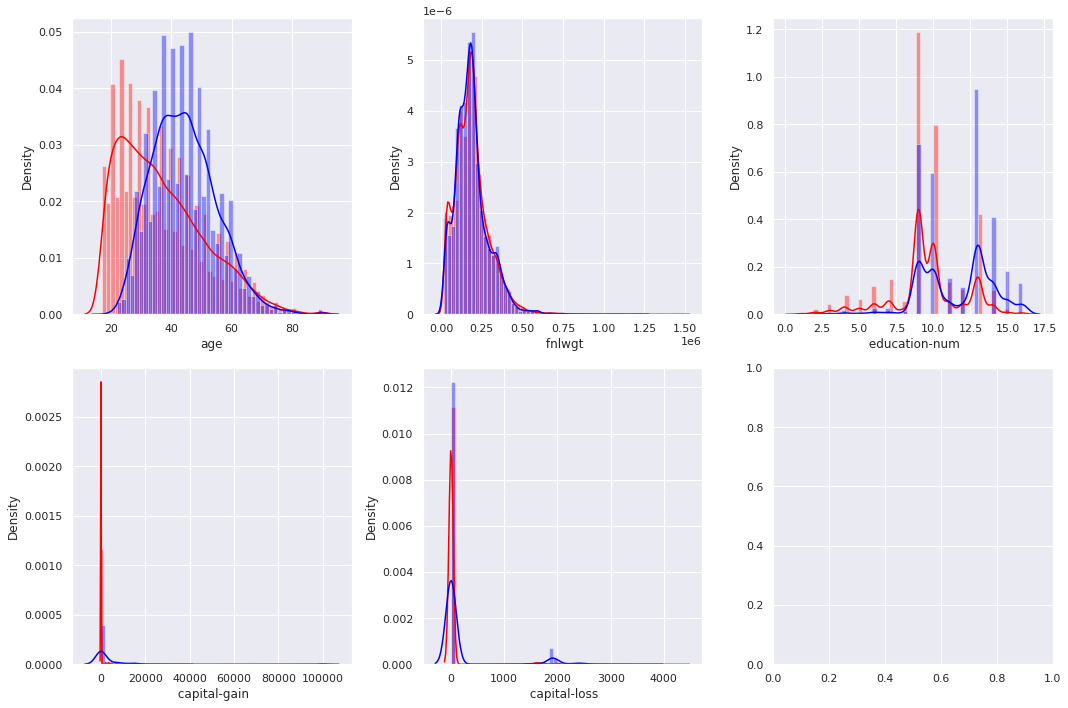

In [19]:
# plotting distplot for all numerical columns
fig,ax =plt.subplots(ncols=3,nrows=2,figsize=(15,10))

ax=ax.flatten()

for i, col in enumerate(numerical_columns_name[:-1]):
  sns.distplot(data[col].loc[data[' income']==' <=50K'],ax=ax[i],color='red')
  sns.distplot(data[col].loc[data[' income']==' >50K'],ax=ax[i],color='blue')

plt.tight_layout()

age is an important feature

## Plot boxplot for numerical data:

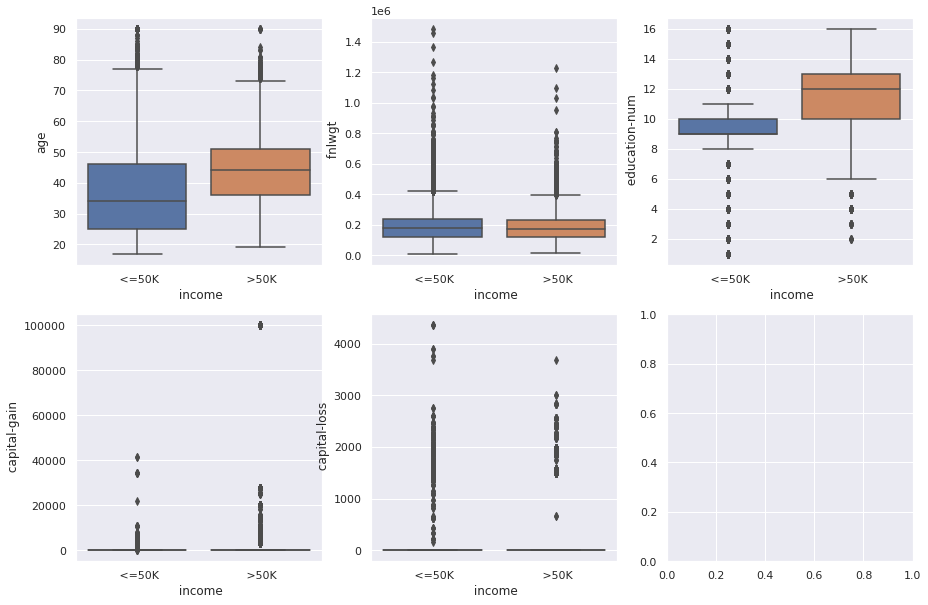

In [20]:
fig, ax=plt.subplots(ncols=3, nrows=2, figsize=(15,10))

ax=ax.flatten()

# index for the figures
i=0 

for col in numerical_columns_name[:-1]:
  sns.boxplot(data=data, y=col, x=' income', ax=ax[i])
  i=i+1

can we remove the outliers in capital_gain (in deep learning??)

## Search for correlated features:

In [21]:
# transform income column
# 1 for <=50K
# 0 for >50K

data[' income'] =[1 if x == ' <=50K' else 0 for x in data[' income'] ]

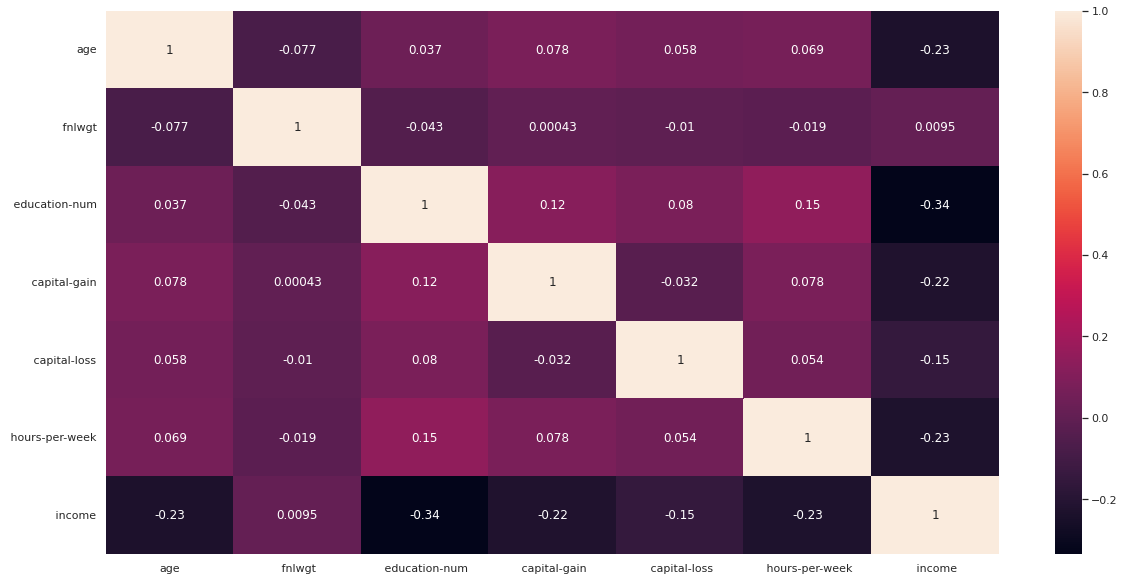

In [22]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(data.corr(),annot=True)
plt.show()

there are no high correlation between the features

In [23]:
# search for the correlation between the features and the target column

cor=data.corr()

#correlation with output variable
cor_target =abs(cor[' income'])
cor_target

age                0.234037
 fnlwgt            0.009463
 education-num     0.335154
 capital-gain      0.223329
 capital-loss      0.150526
 hours-per-week    0.229689
 income            1.000000
Name:  income, dtype: float64

there is no feature that has a high correlation with income column

# Encoding:

## new_LabelEncoder:

### new_labelEncoder function implementation:

In [24]:
# a used function for the new_labelEncoder final function
def get_greatest_number(catogry_dict,catogry_dict_1,catogry_dict_0,key):
  great=0
  num=0
  if key in catogry_dict_1:
    great =(catogry_dict_1[key]/catogry_dict[key])
    num =catogry_dict_1[key]
  if (key in catogry_dict_0) and ((key not in catogry_dict_1) or catogry_dict_0[key]>catogry_dict_1[key]):
    great = (catogry_dict_0[key]/catogry_dict[key]) 
    num = catogry_dict_0[key]
  return great, num    

In [25]:
# the final function of the new_labelEncoder
def priorty_label_encoder(old_dataframe,new_dataframe,col_name,target_name):
  catogry_dict =old_dataframe[col_name].value_counts()
  catogry_dict_1=old_dataframe[col_name].loc[old_dataframe[target_name]==1].value_counts()
  catogry_dict_0=old_dataframe[col_name].loc[old_dataframe[target_name]==0].value_counts()
  catogry_dict_1_and_0={}
  pirority_output={}
  greatest_priorty =old_dataframe[col_name].nunique()
  for key, value in catogry_dict.items():
    great, num =get_greatest_number(catogry_dict,catogry_dict_1,catogry_dict_0,key)
    catogry_dict_1_and_0[key] =[great,num]

  output =sorted(catogry_dict_1_and_0.items(), key=lambda item: (item[1]),reverse=True)  

  for i in range(len(output)):
    pirority_output[output[i][0]]=greatest_priorty
    greatest_priorty-=1   

  for i in range(len(new_dataframe[col_name])): 
    new_dataframe[col_name][i]=pirority_output[new_dataframe[col_name][i]]
     

### Encoding using the new_labelEncoder:

In [26]:
object_columns_name.remove(' income')
object_columns_name.append(' native-country')

In [27]:
# making a deep copy of the original dataframe
new_labelEncoder_data =data.copy(deep=True)

In [28]:
#converting the data from catagrocial to numerical

for col_name in object_columns_name:
  priorty_label_encoder(data,new_labelEncoder_data,col_name,' income')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
new_labelEncoder_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,2,13,7,8,3,2,1,2174,0,40,19,1
1,50,4,83311,2,13,1,1,2,2,1,0,0,13,19,1
2,38,6,215646,8,9,3,13,3,2,1,0,0,40,19,1
3,53,6,234721,13,7,1,13,2,3,1,0,0,40,19,1
4,28,6,338409,2,13,1,2,1,3,2,0,0,40,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,6,257302,6,12,1,4,1,2,2,0,0,38,19,1
32557,40,6,154374,8,9,1,9,2,2,1,0,0,40,19,0
32558,58,6,151910,8,9,4,8,4,2,2,0,0,40,19,1
32559,22,6,201490,8,9,7,8,6,2,1,0,0,20,19,1


## LabelEncoder:

In [30]:
# making a deep copy of the original dataframe
labelEncoder_data =data.copy(deep=True)

In [31]:
#converting the data from catagrocial to numerical

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for col in object_columns_name:
  labelEncoder_data[col]=label_encoder.fit_transform(labelEncoder_data[col])

In [32]:
labelEncoder_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,1
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,1
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,1
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,1
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,1
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,0
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,1
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,1


## OneHotEncoder:

In [33]:
# making a deep copy of the original dataframe
OneHotEncoder_data =data.drop(object_columns_name, axis=1).copy(deep=True)

In [34]:
#converting the data from catagrocial to numerical

from sklearn.preprocessing import OneHotEncoder

oneHot_encoder =OneHotEncoder()
encoded_columns=pd.DataFrame(oneHot_encoder.fit_transform(data[object_columns_name]).toarray())

OneHotEncoder_data =pd.concat([OneHotEncoder_data, encoded_columns],axis=1)

In [35]:
OneHotEncoder_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,0,1,2,...,92,93,94,95,96,97,98,99,100,101
0,39,77516,13,2174,0,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,40,154374,9,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,58,151910,9,0,0,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,22,201490,9,0,0,20,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
OneHotEncoder_data.shape

(32561, 109)

In [37]:
# convert columns name from int to string to see the correlation between the new featrues

OneHotEncoder_data.columns  =OneHotEncoder_data.columns.astype(str)

In [38]:
#function to see the if there were a high correlation between the new features

def corr_between_dependant_features_greater_than(data,features_name,corr_value):
  corr_features_names= []
  corr_features_dic={}
  for i in range(len(features_name)-2):
    for j in range(len(features_name)-1):
      j=i+1
      s=features_name[i]+ ',' +features_name[j]
      if abs(data[[features_name[i],features_name[j]]].corr().iat[0,1]>=corr_value) & (s not in corr_features_names):      
        corr_features_dic['('+features_name[i]+','+features_name[j]+') :'] =data[[features_name[i],features_name[j]]].corr().iat[0,1]
        corr_features_names.append(s)
  
  for f in sorted(corr_features_dic, key=corr_features_dic.get, reverse=True):
    print(f, corr_features_dic[f])      

  return corr_features_names


In [39]:
# see the if ther wes a high correlation between the new features
oneHotEncoded_features_name =OneHotEncoder_data.iloc[:,7:].columns
 
# convert the int to string in the features_name
# string_oneHotEncoded_features_name =list(map(str,oneHotEncoded_features_name))

corr_features_names =corr_between_dependant_features_greater_than(OneHotEncoder_data,oneHotEncoded_features_name,0.5)
 

the features are not highly correlated to each others

## Encoder for priorty columns and OneHotEncoder for others:

# DATA ANALYSIS CONCLUSION:



1.  the data samples are not enough for 15 features with just about 32000 records

> *  the data not complix enough: not a good thing for deep learning => expect 
 not a very good result
> * may use smote to increase the number of records

2.  with oneHotEncoder, the features incresed to 109, which made the data even more hard to use for deep learning ( need for more records)

>  * but on other hand, if a smote was used to make number of records large enought for the 109 features , the dataset will be good to use for deep learning

3. the data is a binary_classificaiton problem:

> * loss ='binary_crossentropy'
> * activiations ='sigmoid' in the last layer

4. the data needs standarization:

> *  use batch_normalization

5. the data is simple:

> * use low number of layers






# Deep Learning:

## for new_label_Encoder:

In [45]:
import tensorflow as tf
from tensorflow import keras

In [64]:
from keras.layers import Dense, BatchNormalization, Dropout

model =keras.models.Sequential([
    
    BatchNormalization(input_dim=14),

    Dense(40, activation='relu'),

    BatchNormalization(),

    Dense(20, activation='relu'),

  
    Dense(1, activation='sigmoid')
    
])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 14)               56        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 40)                600       
                                                                 
 batch_normalization_3 (Batc  (None, 40)               160       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 857
Trainable params: 749
Non-trainable params: 108
_________________________________________________________________


what is this summary???

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics =['accuracy'])

what is metrics

### Split the data:

#### Splitting for new_labelEncoder:

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_data_new_label_encoder =new_labelEncoder_data.drop([' income'],axis=1).values
y_data_new_label_encoder =new_labelEncoder_data[' income'].values

In [42]:
x_train_new_label_encoder, x_test_new_label_encoder, y_train_new_label_encoder, y_test_new_label_encoder =train_test_split(x_data_new_label_encoder, y_data_new_label_encoder,test_size=0.3,random_state=1,shuffle=True, stratify=y_data_new_label_encoder)

In [43]:
x_train_new_label_encoder =np.asarray(x_train_new_label_encoder).astype(np.float32)
y_train_new_label_encoder =np.asarray(y_train_new_label_encoder).astype(np.float32)
x_test_new_label_encoder =np.asarray(x_test_new_label_encoder).astype(np.float32)
y_test_new_label_encoder =np.asarray(y_test_new_label_encoder).astype(np.float32)

### Model Fit:

In [74]:
def plot_loss(history):
  plt.figure(figsize=(15,10))
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.xlabel('Epoch')
  plt.ylabel('Loss MSE')
  plt.grid(True)

#### new_labelEncoder:

In [76]:
model.fit(x_train_new_label_encoder,y_train_new_label_encoder,validation_data=(x_test_new_label_encoder,y_test_new_label_encoder), epochs=1000)

Epoch 1/1000
713/713 [==============================] - 2s 3ms/step - loss: 0.3099 - accuracy: 0.8531 - val_loss: 0.3281 - val_accuracy: 0.8502
Epoch 2/1000
713/713 [==============================] - 2s 2ms/step - loss: 0.3119 - accuracy: 0.8516 - val_loss: 0.3285 - val_accuracy: 0.8486
Epoch 3/1000
713/713 [==============================] - 2s 2ms/step - loss: 0.3114 - accuracy: 0.8519 - val_loss: 0.3291 - val_accuracy: 0.8490
Epoch 4/1000
713/713 [==============================] - 2s 3ms/step - loss: 0.3127 - accuracy: 0.8534 - val_loss: 0.3297 - val_accuracy: 0.8477
Epoch 5/1000
713/713 [==============================] - 2s 3ms/step - loss: 0.3120 - accuracy: 0.8530 - val_loss: 0.3288 - val_accuracy: 0.8512
Epoch 6/1000
713/713 [==============================] - 2s 3ms/step - loss: 0.3118 - accuracy: 0.8515 - val_loss: 0.3287 - val_accuracy: 0.8481
Epoch 7/1000
713/713 [==============================] - 2s 3ms/step - loss: 0.3100 - accuracy: 0.8524 - val_loss: 0.3269 - val_accuracy:

In [68]:
# from keras.layers import Dense, BatchNormalization, Dropout

# model =keras.models.Sequential([
    
#     BatchNormalization(input_dim=14),

#     Dense(40, activation='relu'),

#     BatchNormalization(),

#     Dense(20, activation='relu'),

  
#     Dense(1, activation='sigmoid')
    
# ])

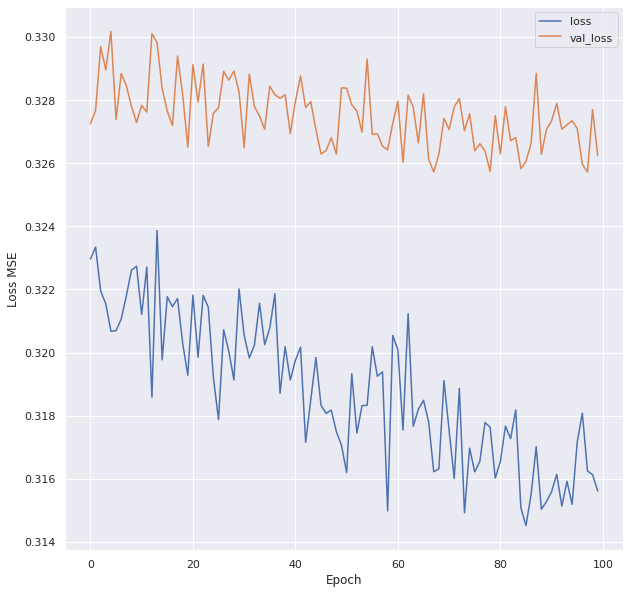

In [71]:
# 393/393 [==============================] - 1s 3ms/step - loss: 0.3128 - accuracy: 0.8547 - val_loss: 0.3255 - val_accuracy: 0.8497
# Epoch 49/50
# 393/393 [==============================] - 1s 3ms/step - loss: 0.3135 - accuracy: 0.8493 - val_loss: 0.3244 - val_accuracy: 0.8546
# Epoch 50/50
# 393/393 [==============================] - 1s 3ms/step - loss: 0.3116 - accuracy: 0.8523 - val_loss: 0.3230 - val_accuracy: 0.8503
 

plot_loss(model.history) #****

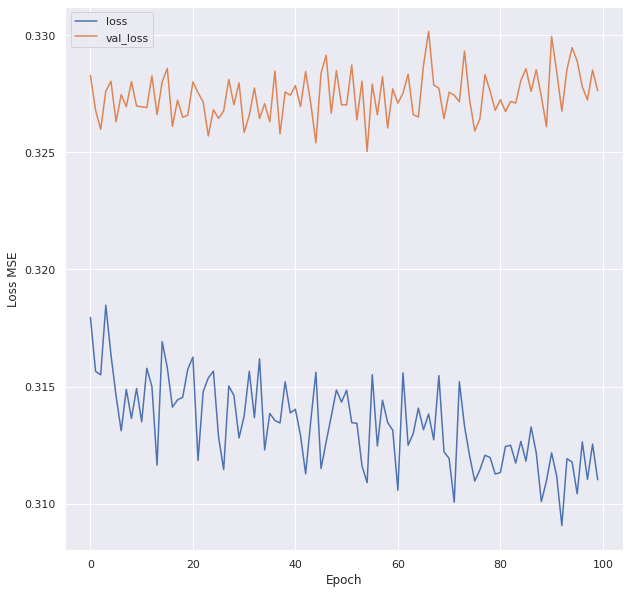

In [73]:
plot_loss(model.history)

In [ ]:
# Epoch 583/1000
# 713/713 [==============================] - 2s 3ms/step - loss: 0.3042 - accuracy: 0.8577 - val_loss: 0.3336 - val_accuracy: 0.8501

# Epoch 1/1000
# 713/713 [==============================] - 2s 3ms/step - loss: 0.3099 - accuracy: 0.8531 - val_loss: 0.3281 - val_accuracy: 0.8502
# Epoch 2/1000
# 713/713 [==============================] - 2s 2ms/step - loss: 0.3119 - accuracy: 0.8516 - val_loss: 0.3285 - val_accuracy: 0.8486
# Epoch 3/1000
# 713/713 [==============================] - 2s 2ms/step - loss: 0.3114 - accuracy: 0.8519 - val_loss: 0.3291 - val_accuracy: 0.8490
# Epoch 4/1000
# 713/713 [==============================] - 2s 3ms/step - loss: 0.3127 - accuracy: 0.8534 - val_loss: 0.3297 - val_accuracy: 0.8477
# Epoch 5/1000
# 713/713 [==============================] - 2s 3ms/step - loss: 0.3120 - accuracy: 0.8530 - val_loss: 0.3288 - val_accuracy: 0.8512

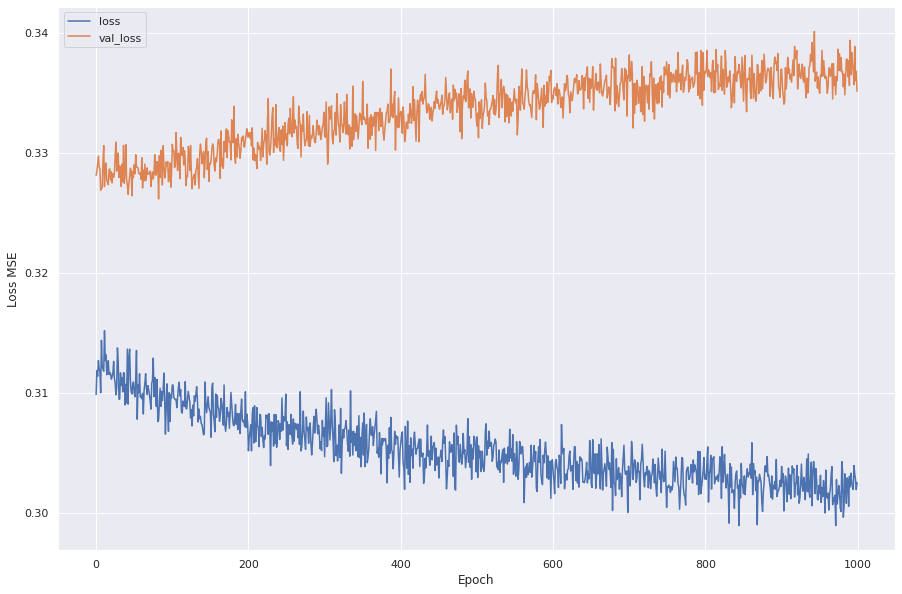

In [77]:

#1000
plot_loss(model.history)